# Cryptocurrency Price Prediction

#### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### Load Data

In [ ]:
#   Data obtained from Yahoo Finance

df_BTC = pd.read_csv('BTC-USD.csv', parse_dates=['Date'], index_col='Date')

In [ ]:
df_BTC.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


### Prediction Model

In [ ]:
#   Create a variable for prediction 'n' days out into the future
predict = 100

#   Create a new attribute which indicates the prediction
df_BTC['Prediction'] = df_BTC[['Close']].shift(-predict)

##### Print new column

In [ ]:
df_BTC.head(5)

,Open,High,Low,Close,Adj Close,Volume,Prediction
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,327.924011
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,315.863007
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,317.239014
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,312.670013
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,310.737000


In [ ]:
#   Create a new indepedent Dataset
X_BTC = np.array(df_BTC[['Close']])

#   Remove last 14 rows
X_BTC = X_BTC[:-predict]

In [ ]:
#   Create a new dependenet Dataset
y_BTC = df_BTC['Prediction'].values

y_BTC = y_BTC[:-predict]

### Training Data

In [ ]:
#   Split data into 85% training and 15% testing
x_train, x_test, y_train, y_test = train_test_split(X_BTC, y_BTC, test_size = 0.20)

In [ ]:
x_train.shape

(2412, 1)

In [ ]:
x_test.shape

(604, 1)

In [ ]:
y_train.shape

(2412,)

In [ ]:
#   Train model
linReg = LinearRegression()
linReg.fit(x_train, y_train)


LinearRegression()

In [ ]:
#   Test model
linReg_confidence = linReg.score(x_test, y_test)

print('The Linear Regression Confidence is:', linReg_confidence)

The Linear Regression Confidence is: 0.708678252769675


In [ ]:
#   Create a var to represent the 14 rows from the original data set 
x_predict = np.array(df_BTC[['Close']])[-604:]

In [ ]:
x_test.shape

(604, 1)

In [ ]:
#   Print the linear Regression model for the next n days
linReg_Prediction = linReg.predict(x_predict)

In [ ]:
#   Print the linear Regression model for the next n days
linReg_Prediction = linReg.predict(x_test)

In [ ]:
x_predict.shape

(604, 1)

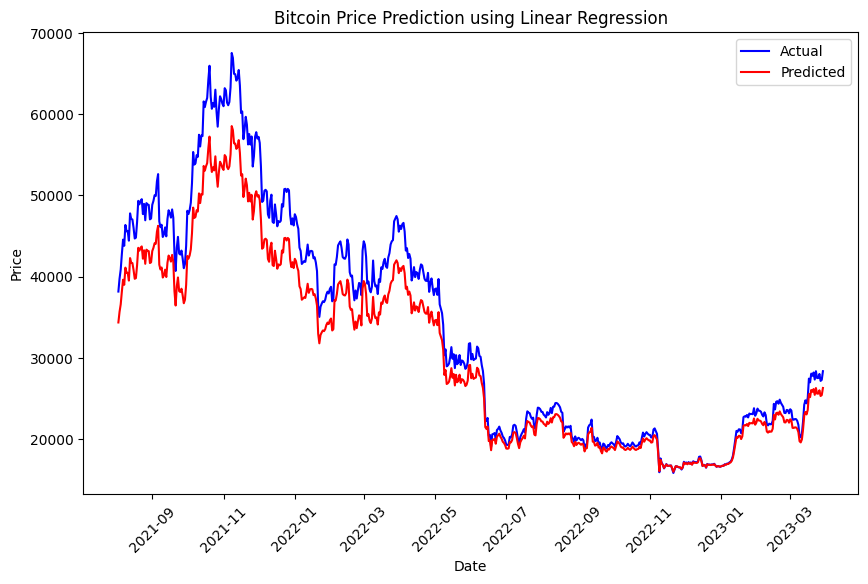

In [ ]:
# Plot the actual vs predicted graph
plt.figure(figsize=(10, 6))
plt.plot(df_BTC.index[-int(len(x_predict)):], x_predict, color='blue', label='Actual')
plt.plot(df_BTC.index[-int(len(x_predict)):], linReg_Prediction, color='red', label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Prediction using Linear Regression')
plt.xticks(rotation=45)
plt.savefig('LR.png')
plt.show()

In [ ]:
# Calculate metrics
mse = mean_squared_error(x_predict, linReg_Prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(x_predict, linReg_Prediction)
r2 = r2_score(x_predict, linReg_Prediction)

In [ ]:
# Print metrics
print('Linear Regression Model Metrics:')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R^2 Score: {r2:.4f}')

Linear Regression Model Metrics:
Mean Squared Error: 14914797.1768
Root Mean Squared Error: 3861.9680
Mean Absolute Error: 2963.7217
R^2 Score: 0.9240
